# Machine Learning Model - Stacking

### 1. [Tutorial links](#tutorials)
### 2. [Load CSV File](#csv_file)
### 3. [Split the dataset into Train-1 - Train-2 - Test](#train_test)
### 4. [Generate meta models](#meta)

> #### 4.1. [Linear Regression Model](#lr_train_test)
  #### 4.2. [Random Forest Model](#rf_train_test)
  #### 4.3. [XGBoost Regressor Model](#xgb_train_test)
  #### 4.4. [LightGBM Regressor Model](#lgb_train_test)
  #### 4.5. [Generalized Boosting Machine (GBM) Model](#gbm_train_test)

### 5. [Combine the predicted values of Train-2](#combine_yhat_train)
### 6. [Combine the predicted values of Test](#combine_yhat_test)
### 7. [Generate top-level model using metamodel predicted values using Train-2](#train_meta)

> #### 7.1. [Use XGBoost Regressor as a top-level model](#xgb_top)

### 8. [Analyze the metamodel and top-level model results](#analyze_results)

> #### 8.1. [Scatter plot the model results](#scatterplot_models)
  #### 8.2  [ Compute the RMSE score of all models](#rmse_models)
  #### 8.3  [Compute and print the percentage increase in performance](#perc_perf)
  
  

## <a id='tutorials'>1. Tutorial links</a>

### Load libraries

In [1]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import Train-Test split library
from sklearn.linear_model import LinearRegression

# Import RandomForestRegressor library
from sklearn.ensemble import RandomForestRegressor

# Import XGBRegressor library
from xgboost import XGBRegressor

# Import LightGBM library
import lightgbm as lgb

# Import GradientBoostingRegressor library
from sklearn.ensemble import GradientBoostingRegressor

# Import Train-Test split library
from sklearn.model_selection import train_test_split

# Import metrics computing library
from sklearn import metrics

# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

# Import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import random to set seed
import random

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


### <a id='csv_file'>2. Load CSV file from GitHub/ Local<a>

In [2]:
# Load Concrete Data file that is saved after Feature Engineering from local disk
# concrete_data = pd.read_csv("data/concrete.csv")

# Load Concrete Data file from github
concrete_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/concrete.csv")

# Print the shape
print (concrete_data.shape)

# Print few rows to visualize the data
concrete_data.head()

(1030, 9)


,cement,blast,flyash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## <a id='train_test'>3. Split the dataset into Train-1 - Train-2 - Test</a>

In [3]:
# Set the Train and Test split ratio to 80:20
TEST_RATIO = 0.2
TRAIN_RATIO = 0.5

# Split the main dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(concrete_data.drop('compressive_strength',  axis = 1), 
                                                    concrete_data['compressive_strength'], 
                                                    test_size=TEST_RATIO, 
                                                    random_state = 225)

# Split the Train dataset into Train1 and Train2
X_train1, X_train2, Y_train1, Y_train2 = train_test_split(X_train, Y_train, test_size=TRAIN_RATIO, random_state = 225)

# Print the shape of the Train-1 set
print("Train-1 dataset: ", X_train1.shape, Y_train1.shape)

# Print the shape of the Train-2 set
print("Train-2 dataset: ", X_train2.shape, Y_train2.shape)

# Print the shape of the Test set
print("Test dataset: ", X_test.shape, Y_test.shape)

Train-1 dataset:  (412, 8) (412,)
Train-2 dataset:  (412, 8) (412,)
Test dataset:  (206, 8) (206,)


## <a id='meta'>4. Generate meta models</a>

![Modelstack](img/stack-1.png)

### <a id='lr_train_test'>4.1 Linear Regression Model</a>

In [12]:
# Set seed for reproducibility
random.seed(22)

# Generate a Linear Regression object
lr_model = LinearRegression()

# Train a Linear Regression model using Train-1 dataset
lr_model.fit(X_train1, Y_train1)

# Predict the outcome on Train-2
y_hat_lr_train2 = lr_model.predict(X_train2)

# Predict the outcome on Test
y_hat_lr_test = lr_model.predict(X_test)
y_hat_lr_test[:8]

array([19.0933908 , 26.36286664, 49.04016149, 59.66782496, 34.64400205,
       24.92458352, 55.05591474, 29.66803779])

### <a id='rf_train_test'>4.2 Random Forest Model</a>

In [13]:
# Generate a Random Forest Regressor object
rf_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, random_state=22)

# Train a Random Forest model using Train-1 dataset
rf_model.fit(X_train1, Y_train1)

# Predict the outcome on Train-2
y_hat_rf_train2 = rf_model.predict(X_train2)

# Predict the outcome on Test
y_hat_rf_test = rf_model.predict(X_test)
y_hat_rf_test[:8]

array([10.8762, 27.7617, 60.4286, 63.7143, 32.852 , 24.8368, 62.136 ,
       17.3313])

### <a id='xgb_train_test'>4.3 XGBoost Regressor Model</a>

In [14]:
# Generate a XGBoost object
xgb_model = XGBRegressor(random_state=22)

# Train a XGBoost model using Train-1 dataset
xgb_model.fit(X_train1, Y_train1)

# Predict the outcome on Train-2
y_hat_xgb_train2 = xgb_model.predict(X_train2)

# Predict the outcome on Test
y_hat_xgb_test = xgb_model.predict(X_test)
y_hat_xgb_test[:8]

[11:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([10.421309, 20.424622, 63.261734, 66.9889  , 31.990044, 24.104477,
       60.82658 , 22.952148], dtype=float32)

### <a id='lgb_train_test'>4.4 LightGBM Regressor Model</a>

In [15]:
# Set seed for reproducibility
random.seed(22)

d_train = lgb.Dataset(X_train1, label=Y_train1)

params = {}
params['learning_rate'] = 0.3
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.6
params['num_leaves'] = 10
params['min_data'] = 5
params['max_depth'] = 5

# Train a LightGBM model using Train-1 dataset
lgb_model = lgb.train(params=params, train_set=d_train, num_boost_round=100)

# Predict the outcome on Train-2
y_hat_lgb_train2 = lgb_model.predict(X_train2)

# Predict the outcome on Test
y_hat_lgb_test = lgb_model.predict(X_test)
y_hat_lgb_test[:8]

array([11.06855711, 18.44118416, 68.17646603, 65.19245748, 28.79990979,
       22.77074216, 66.22507358, 17.14769074])

### <a id='gbm_train_test'>4.5 Gradient Boosting Machine (GBM) Model</a>

In [16]:
# Set seed for reproducibility
random.seed(22)

# Generate a Gradient Boosting Regressor object
gbm_model = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=1, random_state=22)

# Train a  Gradient Boosting Regressor model using Train-1 dataset
gbm_model.fit(X_train1, Y_train1)

# Predict the outcome on Train-2
y_hat_gbm_train2 = gbm_model.predict(X_train2)

# Predict the outcome on Test
y_hat_gbm_test = gbm_model.predict(X_test)
y_hat_gbm_test[:8]

array([ 9.65996412, 18.86587751, 62.15292469, 66.78175275, 32.57228031,
       29.77127839, 62.10896389, 22.68678701])

## <a id='combine_yhat_train'>5 Combine the predicted values of Train-2</a>

![Modelstack](img/stack-2.png)

In [9]:
# Form a dataframe using Train2 predictions
metamodel_train2_df = pd.DataFrame({
                    'Linear_Reg_Prediction': y_hat_lr_train2,
                    'RandomForest_Prediction': y_hat_rf_train2,
                    'XGBoost_Prediction': y_hat_xgb_train2,
                    'LightGBM_Prediction': y_hat_lgb_train2,
                    'GBM_Prediction': y_hat_gbm_train2,
                    'Actual': Y_train2}
)
metamodel_train2_df.head()

,Linear_Reg_Prediction,RandomForest_Prediction,XGBoost_Prediction,LightGBM_Prediction,GBM_Prediction,Actual
198,35.871583,44.5401,41.818840,39.387519,46.344508,37.34
331,39.334756,40.6432,45.571079,44.403395,43.496913,52.50
396,46.051644,62.0302,66.310356,70.136719,65.694177,41.37
150,58.918634,63.5729,65.275810,56.317107,66.236757,66.10
364,33.147136,15.6449,17.373890,22.175703,16.136370,18.02


## <a id='combine_yhat_test'>6 Combine the predicted values of Test</a>

![Modelstack](img/stack-3.png)

In [17]:
# Form a dataframe using Train2 predictions
metamodel_test_df = pd.DataFrame({
                    'Linear_Reg_Prediction': y_hat_lr_test,
                    'RandomForest_Prediction': y_hat_rf_test,
                    'XGBoost_Prediction': y_hat_xgb_test,
                    'LightGBM_Prediction': y_hat_lgb_test,
                    'GBM_Prediction': y_hat_gbm_test,
                    'Actual': Y_test}
)
metamodel_test_df.head()

,Linear_Reg_Prediction,RandomForest_Prediction,XGBoost_Prediction,LightGBM_Prediction,GBM_Prediction,Actual
189,19.093391,10.8762,10.421309,11.068557,9.659964,10.38
427,26.362867,27.7617,20.424622,18.441184,18.865878,19.42
405,49.040161,60.4286,63.261734,68.176466,62.152925,69.84
141,59.667825,63.7143,66.988899,65.192457,66.781753,64.30
920,34.644002,32.8520,31.990044,28.799910,32.572280,29.07


## <a id='train_meta'>7. Generate top-level model using metamodel predicted values using Train-2</a>

### <a id='xgb_top'>7.1 Use XGBoost Regressor as top-level model</a>

In [18]:
# Generate a XGBoost object
xgb_model_top = XGBRegressor(random_state=22)

# Train a XGBoost model using metamodel dataset
xgb_model_top.fit(metamodel_train2_df.drop('Actual', axis = 1), metamodel_train2_df['Actual'])

# Predict the outcome on Test
y_hat_xgb_test_top = xgb_model_top.predict(metamodel_test_df.drop('Actual', axis = 1))


[11:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## <a id='analyze_results'>8. Analyze the metamodel and top-level model results</a>

### <a id='scatterplot_models'>8.1 Scatter plot the model results</a>

Text(0.5, 1.0, 'Scatter plot STACKED MODEL - XGBoost')

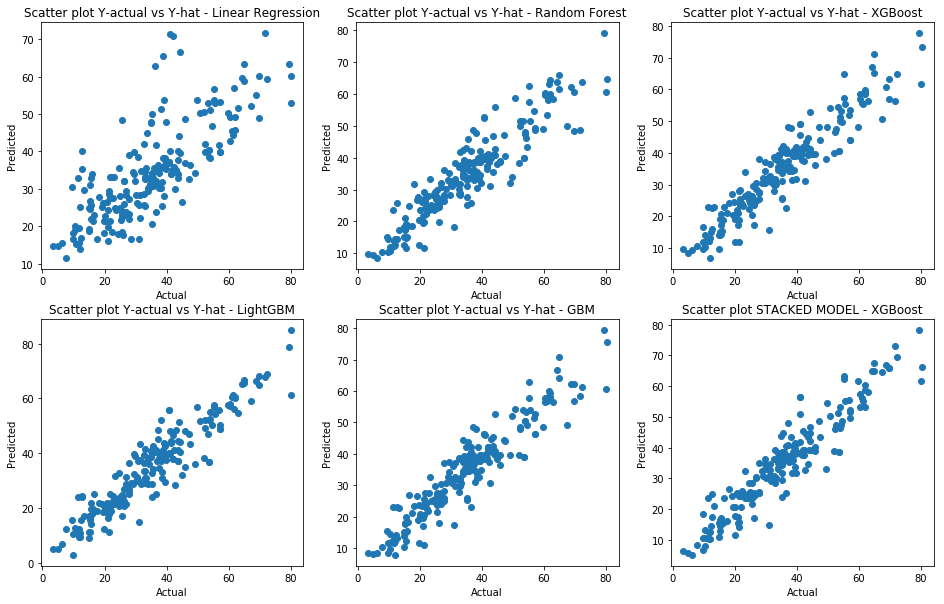

In [19]:
# Set plotting area/ size
plt.figure(1, figsize=(16, 10))

# Set first plot in a grid
plt.subplot(231)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_lr_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - Linear Regression")

# --------------------------
# Set second plot in a grid
plt.subplot(232)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_rf_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - Random Forest")

# --------------------------
# Set third plot in a grid
plt.subplot(233)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_xgb_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - XGBoost")

# --------------------------
# Set fourth plot in a grid
plt.subplot(234)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_lgb_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - LightGBM")

# --------------------------
# Set fifth plot in a grid
plt.subplot(235)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_gbm_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot Y-actual vs Y-hat - GBM")

# --------------------------
# Set sixth plot in a grid
plt.subplot(236)

# Plot the Actual and Predicted values
plt.scatter(Y_test, y_hat_xgb_test_top)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter plot STACKED MODEL - XGBoost")

### <a id='rmse_models'>8.2 Compute the RMSE score of all models</a>

In [20]:
# Compute the RMSE score and print it as a dataframe
rmse_lr = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_lr_test))

rmse_rf = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_rf_test))

rmse_xgb = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_xgb_test))

rmse_lgb = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_lgb_test))

rmse_gbm = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_gbm_test))

rmse_xgb_top = np.sqrt(metrics.mean_squared_error(Y_test, y_hat_xgb_test_top))
                       
rmse_df = pd.DataFrame(
                    {'Linear Regression': [rmse_lr],
                    'Random Forest': [rmse_rf],
                    'XGBoost': [rmse_xgb],
                    'LightGBM': [rmse_lgb],
                    'GBM': [rmse_gbm],
                    'XGB-STACK': [rmse_xgb_top]}
)

rmse_df

,Linear Regression,Random Forest,XGBoost,LightGBM,GBM,XGB-STACK
0,10.205429,6.316279,5.572356,5.738173,5.527342,5.312171


From the above graph, the stacked model's "predicted values" are closely matching with the "actual values". It shows, FOR SURE, the stacking will be working better than the inividual models.

### <a id='perc_perf'>8.3 Compute and print the percentage increase in performance</a>

In [21]:
display ('Percentage increase in RMSE is {}%'.format( round(((rmse_gbm - rmse_xgb_top)/rmse_gbm), 3) * 100))

'Percentage increase in RMSE is 3.9%'